In [41]:
from CLogDKPd import CLogDKPd_MGE, CLogDKPd_MGmB, CLogDKPd_MGE_Ordenado, sigmoid, threshold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
# carregar dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

In [43]:
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train_0_1, y_train_0_1 = x_train[train_filter], y_train[train_filter]
x_test_0_1, y_test_0_1 = x_test[test_filter], y_test[test_filter]

x_train_0_1, y_train_0_1 = select_first_n_per_class(x_train_0_1, y_train_0_1, 100)
x_test_0_1, y_test_0_1 = select_first_n_per_class(x_test_0_1, y_test_0_1, 100)

x_train_array = x_train_0_1.reshape((len(x_train_0_1), 784))
x_test_array = x_test_0_1.reshape((len(x_test_0_1), 784))
x_train_0_1 = x_train_array.astype('float32')
x_test_0_1 = x_test_array.astype('float32')
x_train_0_1 = np.hstack((np.ones((x_train_0_1.shape[0], 1)), x_train_0_1))
x_test_0_1 = np.hstack((np.ones((x_test_0_1.shape[0], 1)), x_test_0_1))


train_filter = np.where((y_train == 0) | (y_train == 2))
test_filter = np.where((y_test == 0) | (y_test == 2))

x_train_0_2, y_train_0_2 = x_train[train_filter], y_train[train_filter]
x_test_0_2, y_test_0_2 = x_test[test_filter], y_test[test_filter]

x_train_0_2, y_train_0_2 = select_first_n_per_class(x_train_0_2, y_train_0_2, 100)
x_test_0_2, y_test_0_2 = select_first_n_per_class(x_test_0_2, y_test_0_2, 100)

x_train_array = x_train_0_2.reshape((len(x_train_0_2), 784))
x_test_array = x_test_0_2.reshape((len(x_test_0_2), 784))
x_train_0_2 = x_train_array.astype('float32')
x_test_0_2 = x_test_array.astype('float32')
x_train_0_2 = np.hstack((np.ones((x_train_0_2.shape[0], 1)), x_train_0_2))
x_test_0_2 = np.hstack((np.ones((x_test_0_2.shape[0], 1)), x_test_0_2))


train_filter = np.where((y_train == 1) | (y_train == 2))
test_filter = np.where((y_test == 1) | (y_test == 2))

x_train_1_2, y_train_1_2 = x_train[train_filter], y_train[train_filter]
x_test_1_2, y_test_1_2 = x_test[test_filter], y_test[test_filter]

x_train_1_2, y_train_1_2 = select_first_n_per_class(x_train_1_2, y_train_1_2, 100)
x_test_1_2, y_test_1_2 = select_first_n_per_class(x_test_1_2, y_test_1_2, 100)

x_train_array = x_train_1_2.reshape((len(x_train_1_2), 784))
x_test_array = x_test_1_2.reshape((len(x_test_1_2), 784))

x_train_1_2 = x_train_array.astype('float32')
x_test_1_2 = x_test_array.astype('float32')
x_train_1_2 = np.hstack((np.ones((x_train_1_2.shape[0], 1)), x_train_1_2))
x_test_1_2 = np.hstack((np.ones((x_test_1_2.shape[0], 1)), x_test_1_2))

y_train_0_1[y_train_0_1==0]=0
y_train_0_1[y_train_0_1==1]=1



y_train_0_2[y_train_0_2==0]=0
y_train_0_2[y_train_0_2==2]=1


y_train_1_2[y_train_1_2==2]=0
y_train_1_2[y_train_1_2==1]=1

In [44]:
eta = 0.5
epochs = 50
alpha = np.zeros(len(x_train_0_1))
d=2
batch_size = len(x_train_0_1)
alpha_0_1, E_0_1 = CLogDKPd_MGmB(x_train_0_1, y_train_0_1, alpha, eta, epochs, d, batch_size)
alpha = np.zeros(len(x_train_0_2))
alpha_0_2, E_0_2 = CLogDKPd_MGmB(x_train_0_2, y_train_0_2, alpha, eta, epochs, d, batch_size)
alpha = np.zeros(len(x_train_1_2))
alpha_1_2, E_1_2 = CLogDKPd_MGmB(x_train_1_2, y_train_1_2, alpha, eta, epochs, d, batch_size)

In [45]:
X_testes = np.concatenate((x_test_0_1, x_test_0_2, x_test_1_2), axis=0)

Y_testes= np.concatenate((y_test_0_1, y_test_0_2, y_test_1_2), axis=0)

previsoes = []
for i in range(len(X_testes)):
    elemento = X_testes[i]
    p_chapeu =0
    for i in range(len(x_train_0_1)):
        p_chapeu += (alpha_0_1[i] * (np.dot(elemento,x_train_0_1[i])**2) )
    previsao_0_1 = (sigmoid(p_chapeu))
    p_chapeu =0
    for i in range(len(x_train_0_2)):
        p_chapeu += (alpha_0_2[i] * (np.dot(elemento,x_train_0_2[i])**2) )
    previsao_0_2 = (sigmoid(p_chapeu))
    p_chapeu =0
    for i in range(len(x_train_1_2)):
        p_chapeu += (alpha_1_2[i] * (np.dot(elemento,x_train_1_2[i])**2) )
    previsao_1_2 = (sigmoid(p_chapeu))
    pontuacao = [0.0, 0.0, 0.0]

    # Update scores based on predictions
    if threshold(previsao_0_1) == 0:
        pontuacao[0] += 1 + previsao_0_1
    if threshold(previsao_0_2) == 0:
        pontuacao[0] += 1 + previsao_0_2

    if threshold(previsao_0_1) == 1:
        pontuacao[1] += previsao_0_1
    if threshold(previsao_1_2) == 1:
        pontuacao[1] += previsao_1_2

    if threshold(previsao_1_2) == 0:
        pontuacao[2] += 1 + previsao_1_2
    if threshold(previsao_0_2) == 1:
        pontuacao[2] += previsao_0_2
    print(np.argmax(pontuacao))
    a=(np.argmax(pontuacao))
    previsoes.append(a)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [46]:
for i in range(len(previsoes)):
    if previsoes[i]==Y_testes[i]:
        print("Acertou")
    else:
        print("errou")

Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
errou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Ac

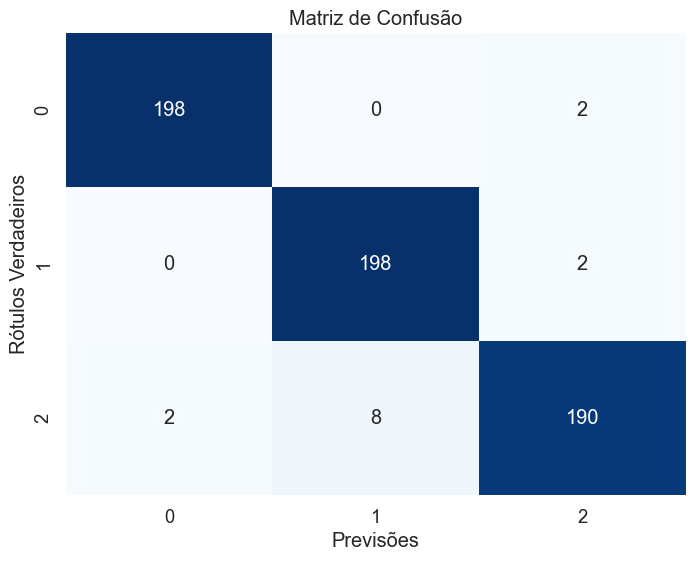

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_testes, previsoes)

# Configurações para plotagem
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte

# Cria o mapa de calor da matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Adiciona rótulos
plt.xlabel('Previsões')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')

# Mostra o gráfico
plt.show()
